In [91]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Data cleaning

In [92]:
DATASET_FILENAME = "final_suicide_2021 1.csv" # name of the csv file containing the dataset

Continue cleaning the dataset:

In [93]:
suicide_data = pd.read_csv(DATASET_FILENAME)
suicide_data.head()

,location,sex,age,anxiety_percent,bipolar_percent,depress_percent,suicide_rate_per100k,country_code,gdp_usd
0,People's Republic of China,Male,15-49 years,0.030089,0.002371,0.025406,7.148372,CHN,12617.505104
1,People's Republic of China,Female,15-49 years,0.049990,0.002573,0.041064,4.274235,CHN,12617.505104
2,Democratic People's Republic of Korea,Male,15-49 years,0.031223,0.002446,0.023614,10.637906,PRK,NaN
3,Democratic People's Republic of Korea,Female,15-49 years,0.052123,0.002546,0.040503,7.770534,PRK,NaN
4,Socialist Republic of Viet Nam,Male,15-49 years,0.022690,0.004234,0.026537,11.649648,VNM,3704.193559


Now we will create separate columns for the rates of mental health conditions and suicide for each gender.

In [94]:
pivoted = suicide_data.pivot_table(
    index=['location', 'age', 'country_code', 'gdp_usd'], # use these as rows in a MultiIndex
    columns='sex', # maks separate disorder and suicide columns by sex
    values=['anxiety_percent', 'bipolar_percent', 'depress_percent', 'suicide_rate_per100k'] # cols to aggregate
)

pivoted.head() # Results in a table with a MultiIndex for both the index and columns

anxiety_percent  \
sex                                                                Female   
location            age         country_code gdp_usd                        
American Samoa      15-49 years ASM          15236.160488        0.064493   
Antigua and Barbuda 15-49 years ATG          17340.379069        0.086864   
Argentine Republic  15-49 years ARG          10738.017922        0.111099   
Australia           15-49 years AUS          60607.778861        0.109350   
Barbados            15-49 years BRB          18696.785895        0.089775   

                                                                     \
sex                                                            Male   
location            age         country_code gdp_usd                  
American Samoa      15-49 years ASM          15236.160488  0.039367   
Antigua and Barbuda 15-49 years ATG          17340.379069  0.049242   
Argentine Republic  15-49 years ARG          10738.017922  0.057252   
Australia           15-49 years AUS          60607.778861  0.068449   
Barbados            15-49 years BRB          18696.785895  0.051127   

                                                          bipolar_percent  \
sex                                                                Female   
location            age         country_code gdp_usd                        
American Samoa      15-49 years ASM          15236.160488        0.003532   
Antigua and Barbuda 15-49 years ATG          17340.379069        0.013375   
Argentine Republic  15-49 years ARG          10738.017922        0.011635   
Australia           15-49 years AUS          60607.778861        0.016182   
Barbados            15-49 years BRB          18696.785895        0.013237   

                                                                     \
sex                                                            Male   
location            age         country_code gdp_usd                  
American Samoa      15-49 years ASM          15236.160488  0.003448   
Antigua and Barbuda 15-49 years ATG          17340.379069  0.011714   
Argentine Republic  15-49 years ARG          10738.017922  0.009242   
Australia           15-49 years AUS          60607.778861  0.015370   
Barbados            15-49 years BRB          18696.785895  0.011617   

                                                          depress_percent  \
sex                                                                Female   
location            age         country_code gdp_usd                        
American Samoa      15-49 years ASM          15236.160488        0.040142   
Antigua and Barbuda 15-49 years ATG          17340.379069        0.057791   
Argentine Republic  15-49 years ARG          10738.017922        0.055580   
Australia           15-49 years AUS          60607.778861        0.087065   
Barbados            15-49 years BRB          18696.785895        0.060730   

                                                                     \
sex                                                            Male   
location            age         country_code gdp_usd                  
American Samoa      15-49 years ASM          15236.160488  0.030680   
Antigua and Barbuda 15-49 years ATG          17340.379069  0.030021   
Argentine Republic  15-49 years ARG          10738.017922  0.036287   
Australia           15-49 years AUS          60607.778861  0.059841   
Barbados            15-49 years BRB          18696.785895  0.035615   

                                                          suicide_rate_per100k  \
sex                                                                     Female   
location            age         country_code gdp_usd                             
American Samoa      15-49 years ASM          15236.160488             5.571612   
Antigua and Barbuda 15-49 years ATG          17340.379069             0.251559   
Argentine Republic  15-49 years ARG          10738.017922             4.953540   
Australi

In [95]:
pivoted = pivoted.reset_index() # Turn the MultiIndex in the rows into a single index
pivoted.head()

location          age country_code       gdp_usd  \
sex                                                                
0         American Samoa  15-49 years          ASM  15236.160488   
1    Antigua and Barbuda  15-49 years          ATG  17340.379069   
2     Argentine Republic  15-49 years          ARG  10738.017922   
3              Australia  15-49 years          AUS  60607.778861   
4               Barbados  15-49 years          BRB  18696.785895   

    anxiety_percent           bipolar_percent           depress_percent  \
sex          Female      Male          Female      Male          Female   
0          0.064493  0.039367        0.003532  0.003448        0.040142   
1          0.086864  0.049242        0.013375  0.011714        0.057791   
2          0.111099  0.057252        0.011635  0.009242        0.055580   
3          0.109350  0.068449        0.016182  0.015370        0.087065   
4          0.089775  0.051127        0.013237  0.011617        0.060730   

              suicide_rate_per100k             
sex      Male               Female       Male  
0    0.030680             5.571612  19.082456  
1    0.030021             0.251559   2.028625  
2    0.036287             4.953540  21.255442  
3    0.059841             7.524478  25.598084  
4    0.035615             1.165735   6.877231

In [96]:
# Flatten the MultiIndex columns into a single index
pivoted.columns = ['_'.join(col) for col in pivoted.columns.values]

In [97]:
pivoted.head()

,location_,age_,country_code_,gdp_usd_,anxiety_percent_Female,anxiety_percent_Male,bipolar_percent_Female,bipolar_percent_Male,depress_percent_Female,depress_percent_Male,suicide_rate_per100k_Female,suicide_rate_per100k_Male
0,American Samoa,15-49 years,ASM,15236.160488,0.064493,0.039367,0.003532,0.003448,0.040142,0.030680,5.571612,19.082456
1,Antigua and Barbuda,15-49 years,ATG,17340.379069,0.086864,0.049242,0.013375,0.011714,0.057791,0.030021,0.251559,2.028625
2,Argentine Republic,15-49 years,ARG,10738.017922,0.111099,0.057252,0.011635,0.009242,0.055580,0.036287,4.953540,21.255442
3,Australia,15-49 years,AUS,60607.778861,0.109350,0.068449,0.016182,0.015370,0.087065,0.059841,7.524478,25.598084
4,Barbados,15-49 years,BRB,18696.785895,0.089775,0.051127,0.013237,0.011617,0.060730,0.035615,1.165735,6.877231


In [98]:
# Clean up column names to be snake case and have no trailing underscores
pivoted.columns = [col.lower().strip("_") for col in pivoted.columns]
pivoted.head()

,location,age,country_code,gdp_usd,anxiety_percent_female,anxiety_percent_male,bipolar_percent_female,bipolar_percent_male,depress_percent_female,depress_percent_male,suicide_rate_per100k_female,suicide_rate_per100k_male
0,American Samoa,15-49 years,ASM,15236.160488,0.064493,0.039367,0.003532,0.003448,0.040142,0.030680,5.571612,19.082456
1,Antigua and Barbuda,15-49 years,ATG,17340.379069,0.086864,0.049242,0.013375,0.011714,0.057791,0.030021,0.251559,2.028625
2,Argentine Republic,15-49 years,ARG,10738.017922,0.111099,0.057252,0.011635,0.009242,0.055580,0.036287,4.953540,21.255442
3,Australia,15-49 years,AUS,60607.778861,0.109350,0.068449,0.016182,0.015370,0.087065,0.059841,7.524478,25.598084
4,Barbados,15-49 years,BRB,18696.785895,0.089775,0.051127,0.013237,0.011617,0.060730,0.035615,1.165735,6.877231


In [99]:
# Set the index to a MultiIndex whose levels are the country name and country code

pivoted = pivoted.set_index(["location", "country_code"]) # Set the index to the country name
pivoted = pivoted.drop(columns=["age"]) # drop age column
pivoted.head()

,,gdp_usd,anxiety_percent_female,anxiety_percent_male,bipolar_percent_female,bipolar_percent_male,depress_percent_female,depress_percent_male,suicide_rate_per100k_female,suicide_rate_per100k_male
location,country_code,,,,,,,,,
American Samoa,ASM,15236.160488,0.064493,0.039367,0.003532,0.003448,0.040142,0.030680,5.571612,19.082456
Antigua and Barbuda,ATG,17340.379069,0.086864,0.049242,0.013375,0.011714,0.057791,0.030021,0.251559,2.028625
Argentine Republic,ARG,10738.017922,0.111099,0.057252,0.011635,0.009242,0.055580,0.036287,4.953540,21.255442
Australia,AUS,60607.778861,0.109350,0.068449,0.016182,0.015370,0.087065,0.059841,7.524478,25.598084
Barbados,BRB,18696.785895,0.089775,0.051127,0.013237,0.011617,0.060730,0.035615,1.165735,6.877231


In [100]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(pivoted), columns = pivoted.columns, index = pivoted.index)
scaled_data.head()

,,gdp_usd,anxiety_percent_female,anxiety_percent_male,bipolar_percent_female,bipolar_percent_male,depress_percent_female,depress_percent_male,suicide_rate_per100k_female,suicide_rate_per100k_male
location,country_code,,,,,,,,,
American Samoa,ASM,-0.092538,-0.549566,-0.671467,-1.467871,-1.575137,-1.431164,-1.131721,0.218146,0.126325
Antigua and Barbuda,ATG,-0.016200,0.354850,0.174987,1.198311,1.314183,-0.479321,-1.186341,-1.051381,-1.076415
Argentine Republic,ARG,-0.255723,1.334631,0.861572,0.726859,0.450211,-0.598568,-0.667252,0.070655,0.279577
Australia,AUS,1.553472,1.263914,1.821261,1.958586,2.592254,1.099414,1.284051,0.684160,0.585847
Barbados,BRB,0.033008,0.472529,0.336544,1.160782,1.280517,-0.320828,-0.722895,-0.833231,-0.734462


## EDA

Research Question: What is the relationship between the GDP of each country, the prevalence of various mental health conditions, and the suicide rate? Do these relationships differ by gender?

Make a correlation matrix to see the strength of the linear relationships between features:

<Axes: >

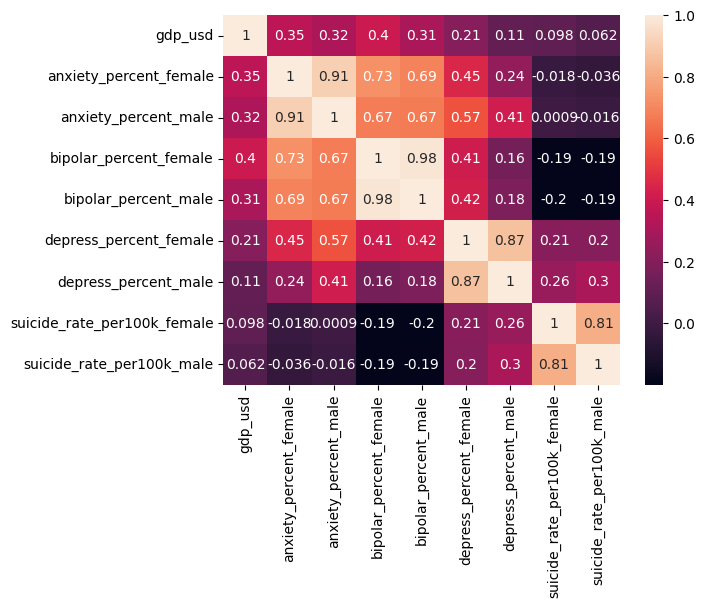

In [101]:
sns.heatmap(scaled_data.corr(), annot=True)